In [140]:
import pandas as pd

In [141]:
#load the data

df = pd.read_csv("D:\Sales dataset\Sales_data_visualization\data\SuperStoreOrders.csv")
print(df)

              order_id  order_date ship_date       ship_mode  \
0         AG-2011-2040    1/1/2011  6/1/2011  Standard Class   
1        IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
2         HU-2011-1220    1/1/2011  5/1/2011    Second Class   
3      IT-2011-3647632    1/1/2011  5/1/2011    Second Class   
4        IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
...                ...         ...       ...             ...   
51285   CA-2014-115427  31-12-2014  4/1/2015  Standard Class   
51286     MO-2014-2560  31-12-2014  5/1/2015  Standard Class   
51287   MX-2014-110527  31-12-2014  2/1/2015    Second Class   
51288   MX-2014-114783  31-12-2014  6/1/2015  Standard Class   
51289   CA-2014-156720  31-12-2014  4/1/2015  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer   New South Wales      Australia

In [142]:
#Explore the dataset
df.info()

#shape of the data
print("Shape:",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [143]:
#Data cleaning
#checks for the missing values
dp=df.isnull().sum()


#Checks duplicates in dataset
df.duplicated().sum()

np.int64(0)

In [144]:
df.describe()       # For numeric columns

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [145]:

df.describe(include='object')   # For categorical columns


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,order_priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,1430,1464,4,795,3,1094,147,7,13,10292,3,17,3788,2246,4
top,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,Muhammed Yedwab,Consumer,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,13,Medium
freq,14,135,130,30775,108,26518,2001,9994,11002,11117,35,31273,6152,227,589,29433


quantity → 877 outliers


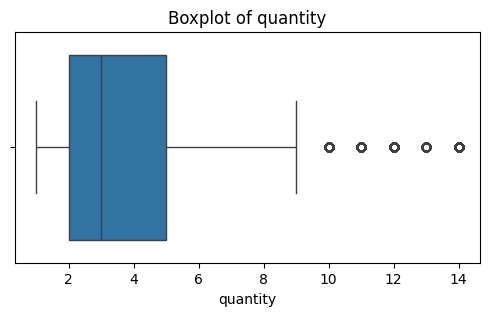

discount → 4172 outliers


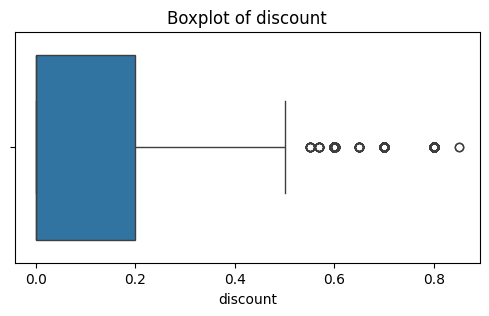

profit → 9755 outliers


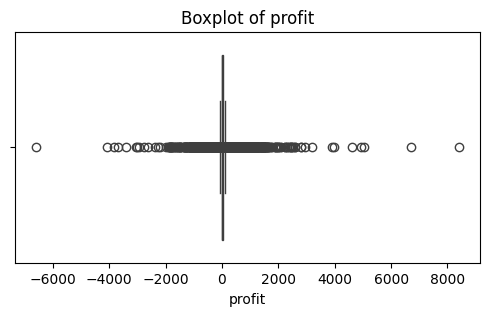

shipping_cost → 5909 outliers


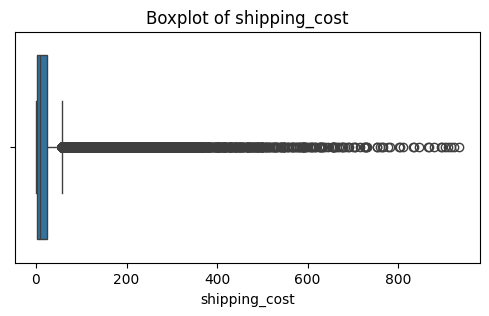

year → 0 outliers


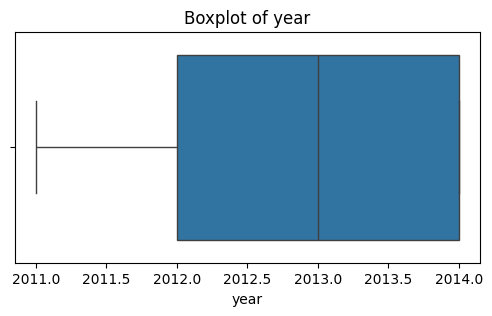

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → {len(outliers)} outliers")
    
    # Optional: visualize
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [147]:
# Keep original df unchanged
new_df = df.copy()

numeric_cols = new_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    new_df[col] = new_df[col].clip(lower, upper)

print(new_df)

              order_id  order_date ship_date       ship_mode  \
0         AG-2011-2040    1/1/2011  6/1/2011  Standard Class   
1        IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
2         HU-2011-1220    1/1/2011  5/1/2011    Second Class   
3      IT-2011-3647632    1/1/2011  5/1/2011    Second Class   
4        IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
...                ...         ...       ...             ...   
51285   CA-2014-115427  31-12-2014  4/1/2015  Standard Class   
51286     MO-2014-2560  31-12-2014  5/1/2015  Standard Class   
51287   MX-2014-110527  31-12-2014  2/1/2015    Second Class   
51288   MX-2014-114783  31-12-2014  6/1/2015  Standard Class   
51289   CA-2014-156720  31-12-2014  4/1/2015  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer   New South Wales      Australia

In [148]:
numeric_cols = new_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = new_df[(new_df[col] < lower) | (new_df[col] > upper)]
    print(f"{col} → {len(outliers)} outliers remain")


quantity → 0 outliers remain
discount → 0 outliers remain
profit → 0 outliers remain
shipping_cost → 0 outliers remain
year → 0 outliers remain


In [149]:
categorical_cols = new_df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)


Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'order_priority'],
      dtype='object')


In [150]:
#Encode categorial Features
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['region', 'category','order_priority','segment','ship_mode']
le = LabelEncoder()
for col in categorical_cols:
    new_df[col] = le.fit_transform(new_df[col])

new_df.head()


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,3,Toby Braunhardt,0,Constantine,Algeria,Africa,0,...,1,Storage,"Tenex Lockers, Blue",408,2.0,0.0,92.025,35.46,3,2011
1,IN-2011-47883,1/1/2011,8/1/2011,3,Joseph Holt,0,New South Wales,Australia,APAC,9,...,1,Supplies,"Acme Trimmer, High Speed",120,3.0,0.1,36.036,9.72,3,2011
2,HU-2011-1220,1/1/2011,5/1/2011,2,Annie Thurman,0,Budapest,Hungary,EMEA,5,...,1,Storage,"Tenex Box, Single Width",66,4.0,0.0,29.640,8.17,1,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,2,Eugene Moren,2,Stockholm,Sweden,EU,7,...,1,Paper,"Enermax Note Cards, Premium",45,3.0,0.5,-26.055,4.82,1,2011
4,IN-2011-47883,1/1/2011,8/1/2011,3,Joseph Holt,0,New South Wales,Australia,APAC,9,...,0,Furnishings,"Eldon Light Bulb, Duo Pack",114,5.0,0.1,37.770,4.70,3,2011


In [151]:
numeric_cols = new_df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['ship_mode', 'segment', 'region', 'category', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [152]:
from sklearn.preprocessing import StandardScaler

# All numeric columns
cols_to_scale = ['quantity', 'discount', 'profit', 'shipping_cost']

# Initialize scaler
scaler = StandardScaler()

# Scale only numeric features used for modeling
new_df[cols_to_scale] = scaler.fit_transform(new_df[cols_to_scale])

print(new_df)


              order_id  order_date ship_date  ship_mode     customer_name  \
0         AG-2011-2040    1/1/2011  6/1/2011          3   Toby Braunhardt   
1        IN-2011-47883    1/1/2011  8/1/2011          3       Joseph Holt   
2         HU-2011-1220    1/1/2011  5/1/2011          2     Annie Thurman   
3      IT-2011-3647632    1/1/2011  5/1/2011          2      Eugene Moren   
4        IN-2011-47883    1/1/2011  8/1/2011          3       Joseph Holt   
...                ...         ...       ...        ...               ...   
51285   CA-2014-115427  31-12-2014  4/1/2015          3        Erica Bern   
51286     MO-2014-2560  31-12-2014  5/1/2015          3         Liz Preis   
51287   MX-2014-110527  31-12-2014  2/1/2015          2  Charlotte Melton   
51288   MX-2014-114783  31-12-2014  6/1/2015          3     Tamara Dahlen   
51289   CA-2014-156720  31-12-2014  4/1/2015          3     Jill Matthias   

       segment             state        country  market  region  ... catego

In [153]:
# Save cleaned dataframe to a new CSV
new_df.to_csv(r"D:\Sales dataset\Sales_data_visualization\data\Sales_cleaned.csv", index=False)

print("Cleaned dataset saved as 'Sales_cleaned.csv'!")


Cleaned dataset saved as 'Sales_cleaned.csv'!
